In [1]:
import numpy as np
import matplotlib.pyplot as plt

In [2]:
N = 1000

In [3]:
ip = np.random.rand(N) > 0.5
ip = ip.astype(int)

In [4]:
Es = 1

In [5]:
eb_no_db = np.arange(0,25)

In [6]:
capacity_rate = np.zeros(len(eb_no_db))

capacity_rate_reduced = np.zeros(len(eb_no_db))

capacity_rate_CSIT_reduced = np.zeros(len(eb_no_db))
capacity_rate_CSIT = np.zeros(len(eb_no_db))

In [7]:
def capacity_each_channel(Es,nTx,noise_variance,S):
    
    Es = Es
    
    nTx = nTx
    
    noise_variance = noise_variance
    
    S = S
    
    capacity_each_channel = 0
    
    for kk in range(len(S)):
        
        
        c = np.log2(1 + np.divide(Es,np.multiply(nTx,noise_variance)) * (np.square(S[kk]) ))
        

        capacity_each_channel = capacity_each_channel + c
        
    return capacity_each_channel

In [8]:
def sigma_four(noise_variance,S1,S2,S3,S4,q_optimal_3):
    
    S = [S1, S2, S3, S4]
    
    q_optimal_3 = q_optimal_3
    
    sigma_four_q = []
    
    summation_part = 0
    
    for kk in range(len(S)):
        
        summation_part = summation_part + (noise_variance/np.square(S[kk]))
        
    mu = (1/len(S)) * (Es + summation_part)
    
    for mm in range(len(S)):
        
        qi = mu - (noise_variance/np.square(S[mm]))
        
        if(qi > 0 ):
            
            sigma_four_q.append(qi)
            
        else:
            sigma_four_q = []
            
            sigma_four_q = q_optimal_3.copy()
            
            break
            
    return sigma_four_q

In [9]:
def sigma_three(noise_variance,S1,S2,S3,q_optimal_2):
    
    S = [S1, S2, S3]
    
    q_optimal_2 = q_optimal_2
    
    sigma_three_q = []
    
    summation_part = 0
    
    for kk in range(len(S)):
        
        summation_part = summation_part + (noise_variance/np.square(S[kk]))
        
    mu = (1/len(S)) * (Es + summation_part)
    
    for mm in range(len(S)):
        
        qi = mu - (noise_variance/np.square(S[mm]))
        
        if(qi > 0 ):
            
            sigma_three_q.append(qi)
            
        else:
            sigma_three_q = []
            
            sigma_three_q = q_optimal_2.copy() 
            
            break
            
    return sigma_three_q

In [10]:
def sigma_two(noise_variance,S1,S2,q_optimal_1):
    
    S = [ S1 , S2 ]
    
    q_optimal_1 = q_optimal_1

    sigma_two_q  = []
    
    summation_part = 0
    
    for kk in range(len(S)):
        
        summation_part = summation_part +  (noise_variance/np.square(S[kk]))
        
    mu = (1/len(S))* (Es + summation_part)
    
    for mm in range(len(S)):
        
        qi = mu - (noise_variance/np.square(S[mm]))
        
        if(qi > 0):
            
            sigma_two_q.append(qi)
            
        else:
            sigma_two_q = []
            
            sigma_two_q = q_optimal_1.copy()
            
            break
            
    return sigma_two_q

In [11]:
def sigma_one(noise_variance,S1):
    
    
    S = [S1]
    
    
    sigma_one_q = []
    
    summation_part = noise_variance / np.square(S1)
    
    mu = (1/len(S)) * (Es + summation_part )
    
    q_optimal = mu - (noise_variance / np.square(S1))
    
    if q_optimal > 0 :
        
        sigma_one_q.append(q_optimal)
        
    
    
    return sigma_one_q

In [12]:
def capacity(noise_variance,S):
    
    S1 = S[0]
    
    S2 = S[1]
    
    S3 = S[2]
    
    S4 = S[3]
    
    S = [S1, S2, S3, S4]
    
    total_capacity = 0
    
    q_optimal_1 = sigma_one(noise_variance,S1)
    
    c1 = np.log2(1 + (1/noise_variance)* np.square(S1) * q_optimal_1[0])
    
    q_optimal_2 = sigma_two(noise_variance,S1,S2,q_optimal_1)
    
    c2 =0
    
    for nn in range(len(q_optimal_2)):
        
        c2 = c2 + np.log2(1 + (1/noise_variance)* np.square(S[nn])*q_optimal_2[nn])
        
    q_optimal_3 = sigma_three(noise_variance,S1,S2,S3,q_optimal_2)
    
    c3 =0
    
    for pp in range(len(q_optimal_3)):
        
        c3 = c3 + np.log2(1 + (1/noise_variance)* np.square(S[pp])*q_optimal_3[pp])
        
    q_optimal_4 = sigma_four(noise_variance,S1,S2,S3,S4,q_optimal_3)
    
    c4 = 0
    
    for ss in range(len(q_optimal_4)):
        
        c4 = c4 + np.log2(1 + (1/noise_variance)* np.square(S[ss])*q_optimal_4[ss])
    
    c = [c1, c2, c3, c4]
    
    c = max(c)
    
    return c

In [13]:
def diagonalQ(noise_variance,S):
    
    S1 = S[0]
    
    S2 = S[1]
    
    S3 = S[2]
    
    S4 = S[3]
    
    S = [S1, S2, S3, S4]
    
    q_optimal_1 = sigma_one(noise_variance,S1)
    
    q_optimal_2 = sigma_two(noise_variance,S1,S2,q_optimal_1)
    
    q_optimal_3 = sigma_three(noise_variance,S1,S2,S3,q_optimal_2)
    
    q_optimal_4 = sigma_four(noise_variance,S1,S2,S3,S4,q_optimal_3)
    
    return q_optimal_4

In [14]:
def Capacity_Rs():
    
    
    
    for jj in range(len(eb_no_db)):
        
        nTx = 4
        
        nRx = 4
        
        snr = 10**(eb_no_db[jj] / 10)
        
        Rz = 10**(-eb_no_db[jj] / 10) * np.eye(nRx)
        
        Rz_inverse = np.linalg.inv(Rz)
        
        Rs = np.divide(Es, nTx) * np.eye(nTx)
        
        capacity = 0
        
        for ii in range(N):
            
            H = (1/np.sqrt(2)) * (np.random.randn(nTx,nRx) + 1j * np.random.randn(nTx,nRx))
    
            H_hermitian = np.conjugate(H)
        
            H_hermitian = np.transpose(H_hermitian)
            
            X = np.dot(np.dot(np.dot(Rz_inverse, H), Rs), H_hermitian)
            
            Y = np.eye(4)
            
            Z = X + Y
            
            c = np.log2(np.abs(np.linalg.det(Z)))
            
            capacity += c

        capacity =capacity / N
        
        capacity_rate[jj] = capacity
        
        

    return capacity_rate


In [15]:
def capacity_reduced_form():
    
    for jj in range(len(eb_no_db)):
        
        nTx = 4
        
        nRx = 4
        
        Es = 1
        
        Rz = 10**(-eb_no_db[jj] / 10) * np.eye(nRx)
        
        Rz_inverse = np.linalg.inv(Rz)
        
        capacity = 0
        
        for ii in range(N):
            
            H = (1/np.sqrt(2)) * (np.random.randn(nTx,nRx) + 1j * np.random.randn(nTx,nRx))
            
            U, S, Vh = np.linalg.svd(H)
    
            noise_variance = 10**(-eb_no_db[jj] / 10)
        
            c = capacity_each_channel(Es,nTx,noise_variance,S)
            
            capacity = capacity + c    
        
        capacity = capacity / N
        
        capacity_rate_reduced[jj] = capacity
        
    return capacity_rate_reduced

In [16]:
def reduced_csit():
    
    for jj in range(len(eb_no_db)):
        
        snr = 10**(eb_no_db[jj] / 10)
        
        noise_variance = (1/snr)
        
        nTx = 4
        
        nRx = 4
        
        total_capacity = 0
        
        for ii in range(N):
            
            H = (1/np.sqrt(2)) * (np.random.randn(nTx,nRx) + 1j * np.random.randn(nTx,nRx))
            
            U,S,Vh = np.linalg.svd(H)
            
            capacity_values = capacity(noise_variance,S)
            
            total_capacity = total_capacity + capacity_values
            
        capacity_rate_CSIT_reduced[jj] = total_capacity / N
        
    return capacity_rate_CSIT_reduced
            

In [17]:
def csit_Rs():
    
    for jj in range(len(eb_no_db)):
        
        snr = 10**(eb_no_db[jj] / 10)
        
        nTx = 4
        
        nRx = 4
        
        Rz = (1/snr) * np.eye(nRx)
        
        Rz_inverse = np.linalg.inv(Rz )
        
        noise_variance = (1/snr)
        
        total_capacity = 0
        
        for ii in range(N):
            
            H = (1/np.sqrt(2)) * (np.random.randn(nTx,nRx) + 1j * np.random.randn(nTx,nRx))
            
            H_hermitian = np.conjugate(H)
            
            H_hermitian = np.transpose(H_hermitian)
            
            U,S,Vh = np.linalg.svd(H)
            
            V = np.conjugate(Vh)
            
            V = np.transpose(V)
            
            diagonal_q = diagonalQ(noise_variance,S)
            
            diagonal_matrix = np.diag(diagonal_q)
            
            if diagonal_matrix.shape[0] < 4 or diagonal_matrix.shape[1] < 4:
                
                diagonal_matrix = np.pad(diagonal_matrix, ((0, 4 - diagonal_matrix.shape[0]), (0, 4 - diagonal_matrix.shape[1])), mode='constant')
            
            Rs = V @ diagonal_matrix @ Vh
            
            z = (np.eye(nRx) + Rz_inverse @ H @ Rs @ H_hermitian)
            
            c = np.linalg.det(z)
            c = np.log2(abs(c))
            
            total_capacity = total_capacity + c
            
        capacity_rate_CSIT[jj] = total_capacity / N
    
    return capacity_rate_CSIT

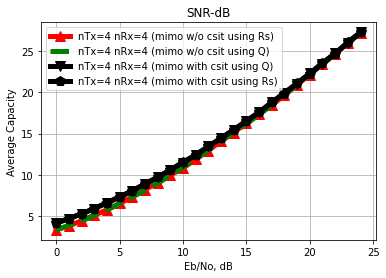

In [18]:
capacity_function = Capacity_Rs() 
capacity_reduced_form = capacity_reduced_form()
reduced_csit_result = reduced_csit()
csitRs_result = csit_Rs()
plt.figure()
plt.figure(figsize=(10, 10))
plt.plot(eb_no_db, capacity_function, 'r^-', linewidth=5, markersize=10, label='nTx=4 nRx=4 (mimo w/o csit using Rs)')
plt.plot(eb_no_db, capacity_reduced_form, 'g--', linewidth=5, markersize=10, label='nTx=4 nRx=4 (mimo w/o csit using Q)')
plt.plot(eb_no_db, reduced_csit_result, 'kv-', linewidth=5, markersize=10, label='nTx=4 nRx=4 (mimo with csit using Q)')
plt.plot(eb_no_db, csitRs_result, 'kp-', linewidth=5, markersize=10, label='nTx=4 nRx=4 (mimo with csit using Rs)')
plt.grid(True)

plt.legend()

plt.xlabel('Eb/No, dB')

plt.ylabel('Average Capacity')

plt.title('SNR-dB')

plt.show()